          sham_1    sham_2     tac_1     tac_2    jq1w_1    jq1w_2     jq1_1  \
sham_1  1.000000  0.999764  0.998555  0.999195  0.998842  0.998797  0.999484   
sham_2  0.999764  1.000000  0.998749  0.999232  0.998921  0.998930  0.999720   
tac_1   0.998555  0.998749  1.000000  0.999688  0.999455  0.999694  0.999473   
tac_2   0.999195  0.999232  0.999688  1.000000  0.999557  0.999683  0.999628   
jq1w_1  0.998842  0.998921  0.999455  0.999557  1.000000  0.999929  0.999422   
jq1w_2  0.998797  0.998930  0.999694  0.999683  0.999929  1.000000  0.999516   
jq1_1   0.999484  0.999720  0.999473  0.999628  0.999422  0.999516  1.000000   
jq1_2   0.999200  0.999456  0.999535  0.999589  0.999666  0.999744  0.999867   

           jq1_2  
sham_1  0.999200  
sham_2  0.999456  
tac_1   0.999535  
tac_2   0.999589  
jq1w_1  0.999666  
jq1w_2  0.999744  
jq1_1   0.999867  
jq1_2   1.000000  


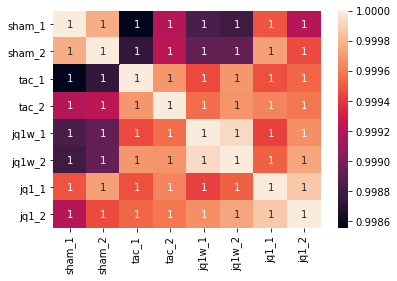

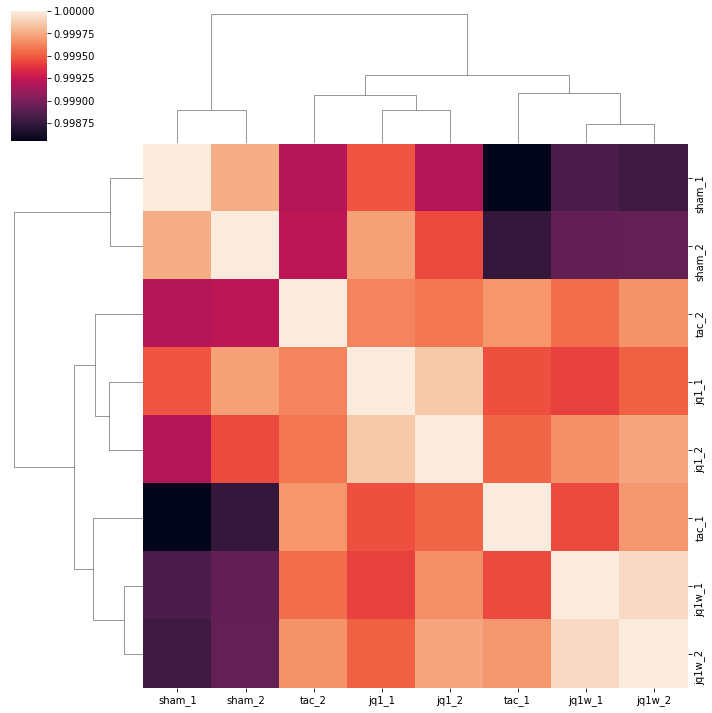

In [2]:
import data_science as ds 
import pandas as pd
import seaborn as sns

#wd = /pollard/home/smorin/Pollard-Lab
#data stored in : /pollard/data/projects/morin/Counts/

       
#----------------MAIN PROGRAM
rel_path = "../../../data/projects/morin/Counts/"
#store data in dictionary using key:sample, value: log(count+1) for CPM normalization
#and value: (log(count+1), length) for CPKM normalization
sampleDict = {} 

#retrieve samples from specified experiment
#experimental data
exp = "ATAC"

#file holding 16 sample names
#8 samples per experiment 
samples_dir = "../../../data/projects/morin/Samples_Dir"

samples = ds.getFileNames(samples_dir, exp)


#normalize the data using CPM or CPKM
#if CPM is True then we normalize by CPM, else we normalize by CPKM
CPM_bool = True

ds.normalize(CPM_bool, rel_path, samples, sampleDict )


#create data frame and rename columns from sample name to conditions
#with replicate number <condition_repl>
df = pd.DataFrame(data=sampleDict)
df.rename(columns={samples[0]:'sham_1',
                    samples[1]:'sham_2',
                    samples[2]:'tac_1', 
                    samples[3]:'tac_2',
                    samples[4]:'jq1w_1',
                    samples[5]:'jq1w_2',
                    samples[6]:'jq1_1',
                    samples[7]:'jq1_2',}, 
                    inplace=True)
# print(df)

#not necessarily sequential analysis
#-----------------Analysis part 1: Violin and Swarmplot--------------------
#create figure objects 
violin = sns.violinplot(data=df, inner = None)
swarmplot = sns.swarmplot(data=df,color="black", edgecolor="gray", size=2)

#get figure and save figure
norm = '' 
if CPM_bool == True:
    norm = "CPM"
else:
    norm = "CPKM"
img_format = '.png'
figure1 = "violin_swarmplot"
filename1 = figure1 + '_' + exp + '_' + "samples" + '_' + norm + img_format
# fig1 = swarmplot.get_figure()
# fig1.savefig(filename1)


#-----------------Analysis part 2: Heatmap and Clustermap------------------
#create correlation matrix using the pearson correlation coefficient
corr_matrix = df.corr(method = 'pearson')
print(corr_matrix)

heatmap = sns.heatmap(corr_matrix, annot=True)
cluster = sns.clustermap(corr_matrix)

figure2 = "heatmap"
filename2 = figure2 + '_' + exp + '_' + "samples" + '_' + norm + img_format
# fig2 = heatmap.get_figure()
# fig2.savefig(filename2)

figure3 = "clustermap"
filename3 = figure3 + '_' + exp + '_' + "samples" + '_' + norm + img_format
# cluster.savefig(filename3)




